## Dados (Definição e Tratamentos)

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/erlonL/Projeto-ICD/main/heart-disease.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [52]:
df = df.dropna() # retirando possíveis elementos NaN/Na

In [53]:
# Tratamento para melhor visualização
def troca_por_categoria(valor_coluna):
  if valor_coluna == "Poor":
    valor_coluna = 1
  elif valor_coluna == "Fair":
    valor_coluna = 2
  elif valor_coluna == "Good":
    valor_coluna = 3
  elif valor_coluna == "Very good":
    valor_coluna = 4
  elif valor_coluna == "Excellent":
    valor_coluna = 5
  return valor_coluna

df['GenHealthNUM'] = df['GenHealth'].apply(troca_por_categoria)

# Visualização de dados

### Conhecendo as frequências de dados (Histogramas)

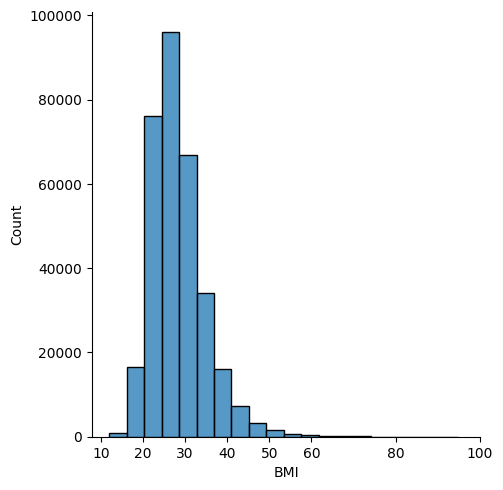

In [54]:
# Índices de BMI (IMC)
sns.displot(df['BMI'], bins = 20)
plt.xticks([10, 20, 30, 40, 50, 60, 80, 100])
plt.show()

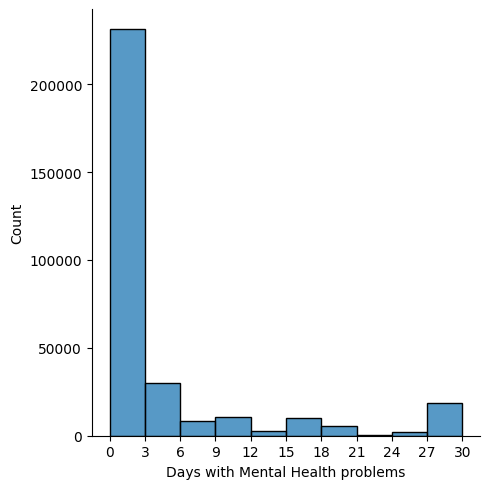

In [55]:
# Dias com problemas de saúde mental
sns.displot(df['MentalHealth'], bins = 10)
plt.xlabel("Days with Mental Health problems")
plt.xticks(np.arange(0, 33, 3)) # define o xticks para 0 a 30 com step de 3.
plt.show()

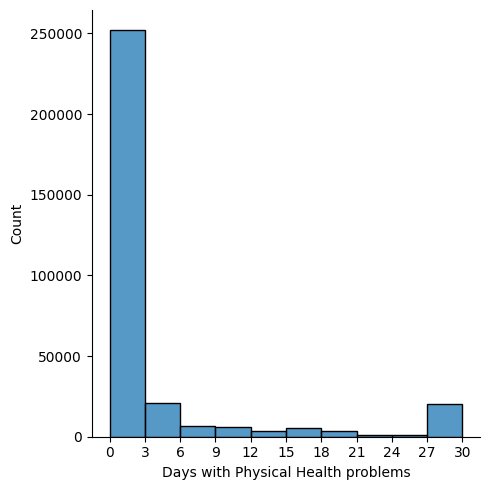

In [56]:
# Dias com problemas físicos
sns.displot(df['PhysicalHealth'], bins = 10)
plt.xlabel("Days with Physical Health problems")
plt.xticks(np.arange(0, 33, 3)) # define o xticks para 0 a 30 com step de 3.
plt.show()

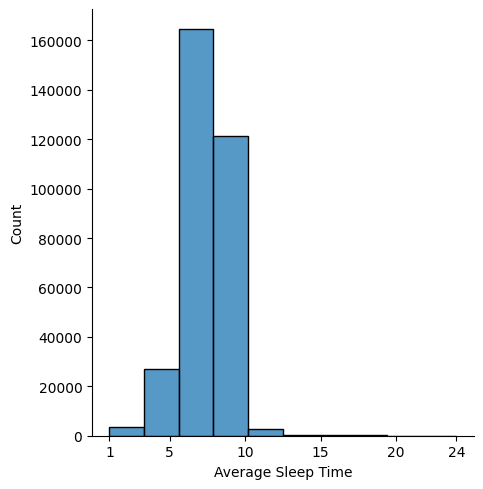

In [57]:
# Média de horas dormidas
sns.displot(df['SleepTime'], bins = 10)
plt.xlabel("Average Sleep Time")
plt.xticks([1, 5, 10, 15, 20, 24])
plt.show()

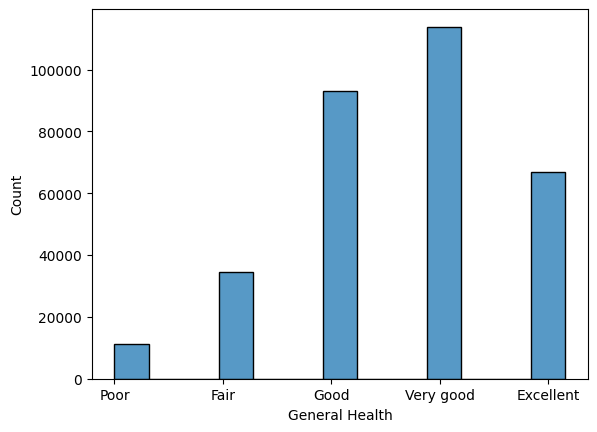

In [58]:
# Saúde geral
sns.histplot(df['GenHealthNUM'], binwidth = 0.32)

# Labels para 1, 2, 3, 4, 5, respectivamente
xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"] 
plt.xticks([1, 2, 3, 4, 5], xtick_labels)

plt.xlabel("General Health")
plt.show()

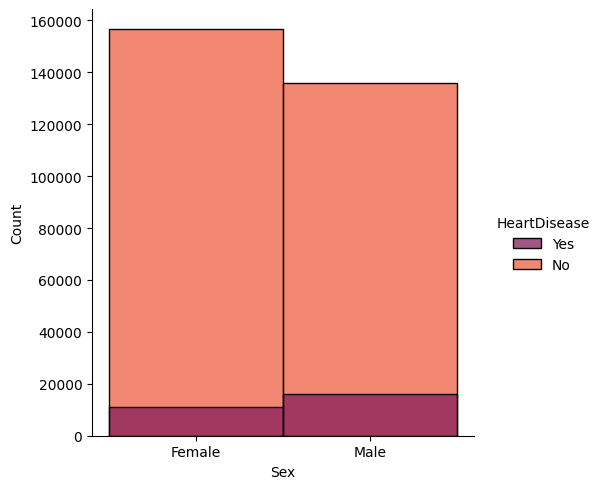

In [59]:
# Relação de gênero e problemas no coração
sns.displot(data = df, x = "Sex", hue = 'HeartDisease', hue_order=['Yes', 'No'], alpha = 0.75, palette = 'rocket')
plt.show()

O gráfico demonstra que existe uma desproporção entre os índices de problemáticos cardíacos e o sexo. É possível observar que mesmo com maior quantidade de mulheres na base de dados, os homens lideram na quantidade de pessoas com problemas cardíacos, podendo indicar uma possível relação do sexo.

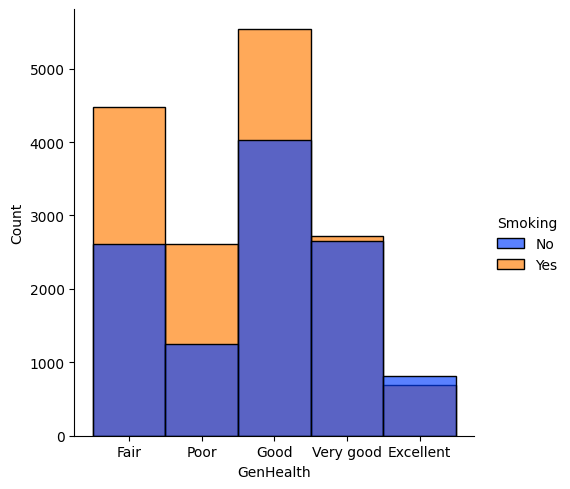

In [60]:
# Relação (utlizando pessoas que tiveram problemas no coração)
# de saúde geral com o ato de fumar 
sns.displot(data = df.loc[df['HeartDisease'] == 'Yes'], x = "GenHealth", hue = 'Smoking', hue_order=['No', 'Yes'], alpha = 0.65, palette = "bright")
plt.show()

O gráfico demonstra que a proporção de fumantes em pessoas com saúde geral boa são bem menores quando comparada com saúde geral ruim, demonstrando que o ato de fumar pode ser bem impactante na saúde geral.

### Gráficos de linha / Barra

#### Relação SleepTime / Days with Mental / Physical problems

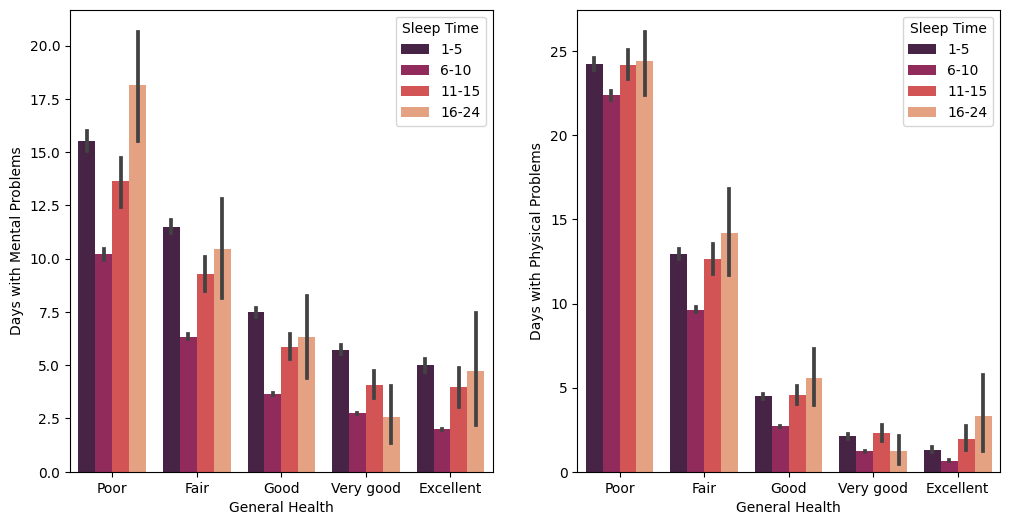

In [61]:
# Categorizando os dados de SleepTime

bins = [1, 5, 10, 15, 24]
labels = ['1-5', '6-10', '11-15', '16-24']
df['SleepTimeCat'] = pd.cut(df['SleepTime'], bins=bins, labels=labels)

# Criando uma figura com dois eixos de plotagem
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plotando o primeiro gráfico no primeiro eixo de plotagem
sns.barplot(data=df, x="GenHealthNUM", y="MentalHealth", hue="SleepTimeCat", alpha=1, palette="rocket", ax=ax1)
ax1.legend(title="Sleep Time")
ax1.set_xlabel("General Health")
ax1.set_ylabel("Days with Mental Problems")

ax1.set_xticks([0, 1, 2, 3, 4])
ax1.set_xticklabels(["Poor", "Fair", "Good", "Very good", "Excellent"])

# Plotando o segundo gráfico no segundo eixo de plotagem
sns.barplot(data=df, x="GenHealthNUM", y="PhysicalHealth", hue="SleepTimeCat", palette="rocket", ax=ax2)
ax2.legend(title="Sleep Time")
ax2.set_xlabel("General Health")
ax2.set_ylabel("Days with Physical Problems")

ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticklabels(["Poor", "Fair", "Good", "Very good", "Excellent"])

plt.show()


Nesse comparativo de gráfico, é possível identificar que as pessoas que dormem entre 6 e 10 horas possuem menor incidência problemas físicos e mentais em todos os comparativos de General Health.
Além disso, é possível ver que os extremos de sono (muitas horas de sono e poucas horas) proporcionam um aumento nos índices de problemas físicos e mentais (ou vice-versa, ainda não é possível definir).


#### SleepTime / BMI

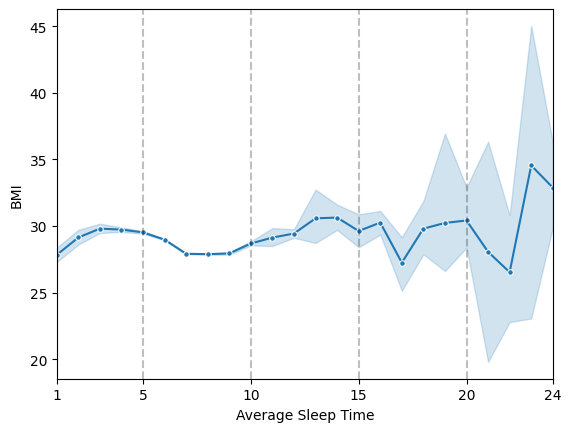

In [62]:
sns.lineplot(data = df, x = "SleepTime", y = "BMI", marker='o', markersize = 4)
plt.xlabel("Average Sleep Time")
for i in range(5, 24, 5):
    plt.axvline(x=i, linestyle='--', color='black', alpha = 0.25)
plt.xlim([1, 24])
plt.xticks([1, 5, 10, 15, 20, 24])
plt.show()

O gráfico demonstra que quanto maior o tempo dormido, maior a variação do BMI.
Também demonstrando que o período em torno de 7 e 9 horas é marcado por um BMI baixo e mais constante, também apresentando poucas dispersões.

#### MentalHealth / PhysicalHealth (Dias)

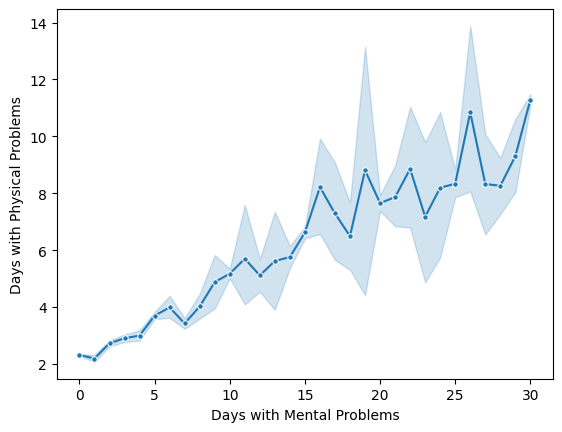

In [63]:
sns.lineplot(data = df, x = "MentalHealth", y = "PhysicalHealth", marker = 'o', markersize = 4)
plt.xlabel("Days with Mental Problems")
plt.ylabel("Days with Physical Problems")
plt.show()

Aqui percebe-se uma relação entre os dias com problemas de saúde física e mental, quanto maior um, maior o outro.

#### GenHealth / Physical/Mental Health

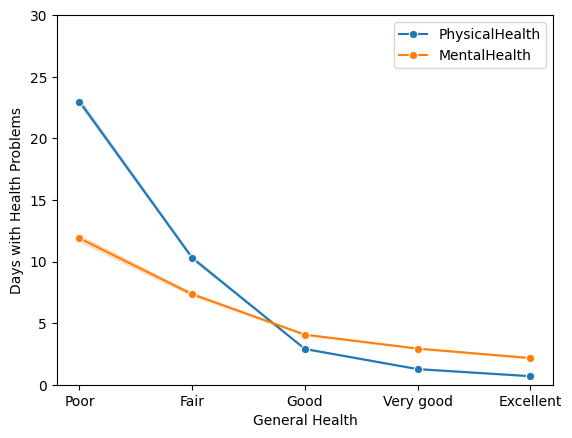

In [64]:
sns.lineplot(data = df, x = df['GenHealthNUM'], y = "PhysicalHealth", label = 'PhysicalHealth', marker = 'o')
sns.lineplot(data = df, x = df['GenHealthNUM'], y = "MentalHealth", label = 'MentalHealth', marker = 'o')

xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"]
plt.xticks([1, 2, 3, 4, 5], xtick_labels)

plt.ylabel("Days with Health Problems")
plt.xlabel("General Health")
plt.ylim([0, 30])

plt.show()

Pode-se perceber que quanto maior os dias com problemas de saúde, pior vai ser a saúde geral. Também percebe-se que a saúde física tem um maior impacto na saúde geral do que a mental, pois a curva para 'PhysicalHealth' é maior.

#### GenHealth / SleepTime

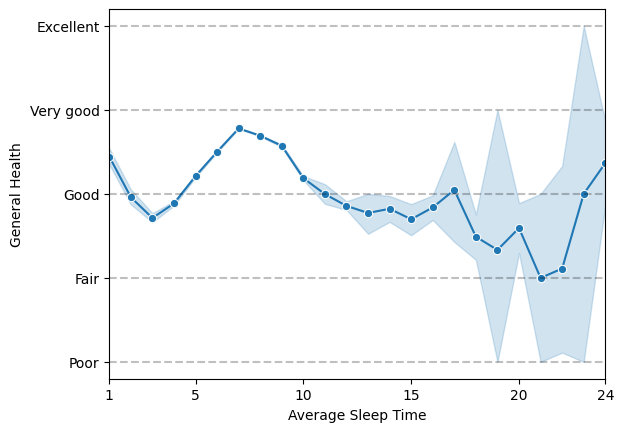

In [73]:
sns.lineplot(data = df, x = "SleepTime", y = "GenHealthNUM", marker='o')

ytick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"]
plt.yticks([1, 2, 3, 4, 5], ytick_labels)

plt.ylabel("General Health")
plt.xlabel("Average Sleep Time")

# define as posições das linhas pontilhadas
for i in range(1, 6):
    plt.axhline(y=i, linestyle='--', color='black', alpha = 0.25)

plt.xlim([1, 24])
plt.xticks([1, 5, 10, 15, 20, 24])
plt.show()

As pessoas que dormem entre 5 e 10 horas por dia tem as melhores saúdes gerais. Mais especificamente, as que dormem 7 horas por dia, tem o melhor índice de saúde geral.

#### PhysicalActivity / PhysicalHealth

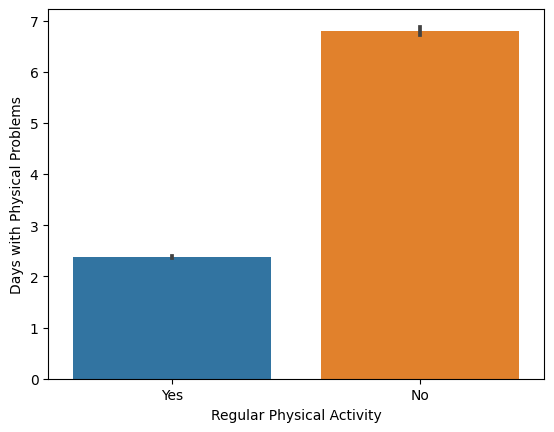

In [66]:
sns.barplot(data = df, x = "PhysicalActivity", y = "PhysicalHealth")

#plt.xticks([0.0, 1.0],["No", "Yes"]) # Mostra 0 como 'No' e 1 como 'Yes'
plt.xlabel("Regular Physical Activity")
plt.ylabel("Days with Physical Problems")

plt.show()

O gráfico demonstra a possível relação: As pessoas que não fazem atividade física regularmente têm períodos maiores de dias com problemas de saúde física.

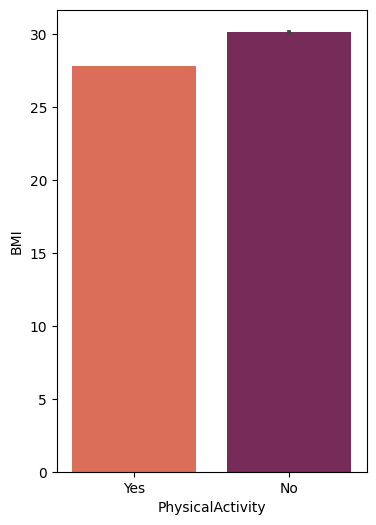

In [67]:
sns.barplot(data = df, x = "PhysicalActivity", y = "BMI", palette = "rocket_r")
plt.gcf().set_size_inches(4, 6) # Define o tamanho da figura

plt.show()

O gráfico demonstra que existe uma possível relação: As pessoas que não praticam atividade física regularmente possuem maiores índices de BMI.








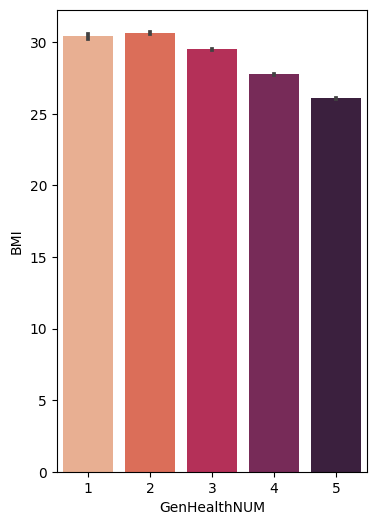

In [68]:
sns.barplot(data = df, x = "GenHealthNUM", y = "BMI", palette = "rocket_r")
xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"]
plt.gcf().set_size_inches(4, 6) # Define o tamanho da figura

plt.show()

O gráfico mostra a relação entre o BMI e a saúde geral, demonstrando que pessoas com o BMI menor tende a possuir uma saúde geral melhor

### Gráficos de dispersão

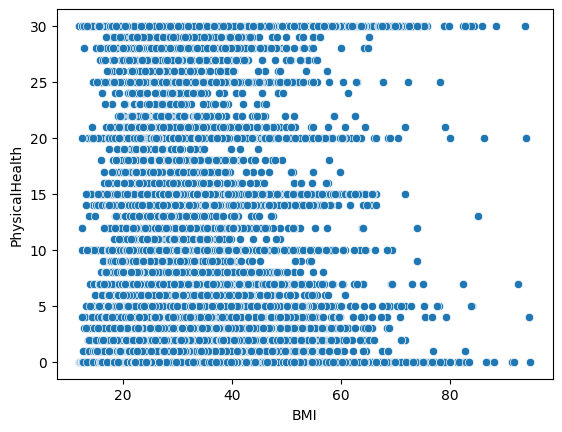

In [69]:
sns.scatterplot(data = df, y = "PhysicalHealth", x = "BMI")
plt.show()

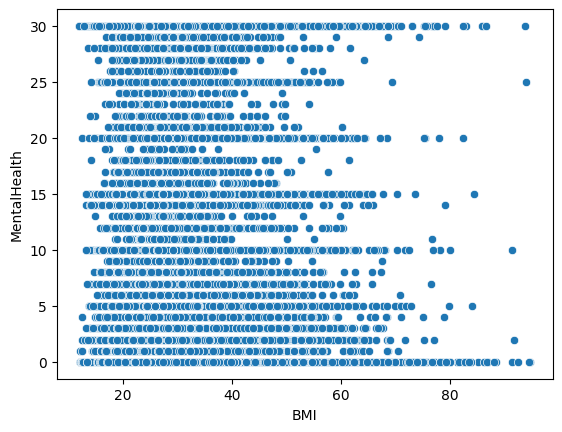

In [70]:
sns.scatterplot(data = df, x = "BMI", y = "MentalHealth")
plt.show()